In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import datetime
import numpy as np

In [2]:
fec = pd.read_csv('donations.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [117]:
fec.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,"5,000.00",29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,"2,500.00",30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.00,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.00,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,"2,500.00",31-AUG-11,NaN,NaN,NaN,SA17A,751678,Republican


In [5]:
unique_cands = fec.cand_nm.unique()

In [6]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [7]:
parties = {'Bachmann, Michelle': 'Republican', 
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican', 
           'Huntsman, Jon': 'Republican', 
           'Johnson, Gary Earl': 'Republican', 
           'McCotter, Thaddeus G': 'Republican', 
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican', 
           'Santorum, Rick': 'Republican'}

In [8]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [9]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [10]:
# add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [11]:
fec.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

A couple of data preparation points. 

First, this data includes both contributions and refunds (negative contribution amount):

In [12]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [13]:
fec.iloc[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                   3.6601e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

In [14]:
# for i in range(len(fec)):
#     row = fec.iloc[i]
#     name = row['cand_nm']
#     datestr = row['contb_receipt_dt']
#     amount = row['contb_receipt_amt']
#     print(name, datestr, amount)

### Sampling The Data

The dataset is quite large, and processing the full dataset can be pretty slow. It is often useful to sample the dataset and try things out on the sample before doing a complete analysis of all of the data. The following is a script that samples the donations dataset. It will print 1 out of every 1000 donations 



In [15]:
# for i in range(len(fec)):
#     if i % 1000 == 0:
#         row = fec.iloc[i]
#         name = row['cand_nm']
#         datestr = row['contb_receipt_dt']
#         amount = row['contb_receipt_amt']
#         print(name, datestr, amount)

In [16]:
# with open('donations_sampled.txt', 'w') as f:
#     with open('donations.csv', 'r') as f_i:
#         i = 0
#         for line in f_i:
#             if i % 1000 == 0:
#                 f.write(line)
#             i += 1

we will now plot Obama's campaign contributions by date. We will compute the total amount of donations for each day, and use matplotlib to create the charts.

method1

In [17]:
# obama_donations = defaultdict(lambda :0)

# for i in range(len(fec)):
#     row = fec.iloc[i]
#     name = row['cand_nm']
#     datestr = row['contb_receipt_dt']
#     amount = float(row['contb_receipt_amt'])
#     date = datetime.datetime.strptime(datestr, '%d-%b-%y')
    
#     if 'Obama' in name:
#         obama_donations[date] += amount
 

In [18]:
#obama_donations

In [19]:
# dictionaries 
# sorted_by_date = sorted(obama_donations.items(), key=lambda kv: kv[0])
# xs,ys = zip(*sorted_by_date)
# plt.plot(xs, ys, label='line')
# plt.legend(loc='upper center', ncol = 4)
# plt.savefig('./test_obama.png', format='png')

The Case of the Negative Donation



In [20]:
# for i in range(len(fec)):
#     row = fec.iloc[i]
#     name = row['cand_nm']
#     datestr = row['contb_receipt_dt']
#     amount = float(row['contb_receipt_amt'])
#     if amount < 0:
#         print(row)

### To simplify the analysis, I’ll restrict the data set to positive contributions

Since Barack Obama and Mitt Romney are the main two candidates, I’ll also prepare a subset that just has contributions to their campaigns

In [21]:
fec_pos = fec[fec.contb_receipt_amt > 0]

In [22]:
fec_mrbo = fec_pos[fec_pos.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [23]:
#the total number of donations by occupation
fec_pos.contbr_occupation.value_counts()[:25]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

You will notice by looking at the occupations that many refer to the same basic job type, or there are several variants of the same thing. Here is a code snippet illustrates a technique for cleaning up a few of them by mapping from one occupation to another; note the “trick” of using `dict.get` to allow occupations with no mapping to “pass through”:

In [24]:
occ_mapping = {
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

In [25]:
# if no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)

In [26]:
fec_pos.contbr_occupation = fec_pos.contbr_occupation.map(f)
fec_mrbo.contbr_occupation = fec_mrbo.contbr_occupation.map(f)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


do the same thing for employers

In [27]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [28]:
# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x) 
fec_pos.contbr_employer = fec_pos.contbr_employer.map(f)
fec_mrbo.contbr_employer = fec_mrbo.contbr_employer.map(f)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
fec_pos.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,NOT PROVIDED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Now, you can use pivot_table to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:

In [30]:
by_occupation = fec_pos.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc=np.sum)

In [31]:
by_occupation.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [32]:
by_occupation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45064 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29165 non-null float64
Republican    21078 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [33]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [34]:
pd.options.display.float_format = '{:40,.2f}'.format
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,"11,141,982.97","7,477,194.43"
CEO,"2,074,974.79","4,211,040.52"
CONSULTANT,"2,459,912.71","2,544,725.45"
ENGINEER,"951,525.55","1,818,373.70"
EXECUTIVE,"1,355,161.05","4,138,850.09"
HOMEMAKER,"4,248,875.80","13,634,275.78"
INVESTOR,"884,133.00","2,431,768.92"
LAWYER,"3,160,478.87","391,224.32"
MANAGER,"762,883.22","1,444,532.37"


It can be easier to look at this data graphically as a bar plot ('barh' means horizontal bar plot)

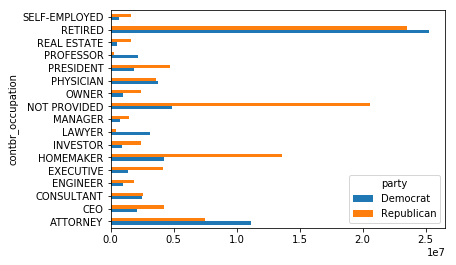

In [35]:
%matplotlib inline
over_2mm.plot(kind='barh')

You might be interested in the top donor occupations or top companies donating to Obama and Romney. To do this, you can group by candidate name and use a variant of the top method 

In [36]:
grouped = fec_mrbo.groupby('cand_nm')

In [37]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    # Order totals by key in descending order
    return totals.sort_values(ascending=False)[:n]

In [38]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED                                        25,305,116.38
               ATTORNEY                                       11,141,982.97
               NOT PROVIDED                                    4,866,973.96
               HOMEMAKER                                       4,248,875.80
               PHYSICIAN                                       3,735,124.94
               LAWYER                                          3,160,478.87
               CONSULTANT                                      2,459,912.71
Romney, Mitt   RETIRED                                        11,508,473.59
               NOT PROVIDED                                   11,396,894.84
               HOMEMAKER                                       8,147,446.22
               ATTORNEY                                        5,364,718.82
               PRESIDENT                                       2,491,244.89
               CEO                                     

In [39]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED                                         22,694,358.85
               SELF-EMPLOYED                                   18,626,807.16
               NOT EMPLOYED                                     8,586,308.70
               NOT PROVIDED                                     5,053,480.37
               HOMEMAKER                                        2,605,408.54
               STUDENT                                            318,831.45
               VOLUNTEER                                          257,104.00
               MICROSOFT                                          215,585.36
               SIDLEY AUSTIN LLP                                  168,254.00
               REFUSED                                            149,516.07
Romney, Mitt   NOT PROVIDED                                    12,059,527.24
               RETIRED                                         11,506,225.71
               HOMEMAKER                  

### Bucketing Donation Amounts

A useful way to analyze this data is to use the cut function to discretize the contributor amounts into buckets by contribution size:

In [40]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [41]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

We can then group the data for Obama and Romney by name and bin label to get a histogram by donation size

In [42]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [43]:
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
               (100, 1000]            153991
               (1000, 10000]           22284
               (10000, 100000]             2
               (100000, 1000000]           3
               (1000000, 10000000]         4
Romney, Mitt   (0, 1]                     77
               (1, 10]                  3681
               (10, 100]               31853
               (100, 1000]             43357
               (1000, 10000]           26186
               (10000, 100000]             1
dtype: int64

In [44]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.00,77.00
"(1, 10]","40,070.00","3,681.00"
"(10, 100]","372,280.00","31,853.00"
"(100, 1000]","153,991.00","43,357.00"
"(1000, 10000]","22,284.00","26,186.00"
"(10000, 100000]",2.00,1.00
"(100000, 1000000]",3.00,nan
"(1000000, 10000000]",4.00,nan


This data shows that Obama has received a significantly larger number of small don- ations than Romney. You can also sum the contribution amounts and normalize within buckets to visualize percentage of total donations of each size by candidate:

In [45]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [46]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]","337,267.62","29,819.66"
"(10, 100]","20,288,981.41","1,987,783.76"
"(100, 1000]","54,798,531.46","22,363,381.69"
"(1000, 10000]","51,753,705.67","63,942,145.42"
"(10000, 100000]","59,100.00","12,700.00"
"(100000, 1000000]","1,490,683.08",nan
"(1000000, 10000000]","7,148,839.76",nan


In [47]:
bucket_sums.sum(axis=1)

contb_receipt_amt
(0, 1]                                                  395.24
(1, 10]                                             367,087.28
(10, 100]                                        22,276,765.17
(100, 1000]                                      77,161,913.15
(1000, 10000]                                   115,695,851.09
(10000, 100000]                                      71,800.00
(100000, 1000000]                                 1,490,683.08
(1000000, 10000000]                               7,148,839.76
dtype: float64

In [48]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [49]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.81,0.19
"(1, 10]",0.92,0.08
"(10, 100]",0.91,0.09
"(100, 1000]",0.71,0.29
"(1000, 10000]",0.45,0.55
"(10000, 100000]",0.82,0.18
"(100000, 1000000]",1.00,nan
"(1000000, 10000000]",1.00,nan


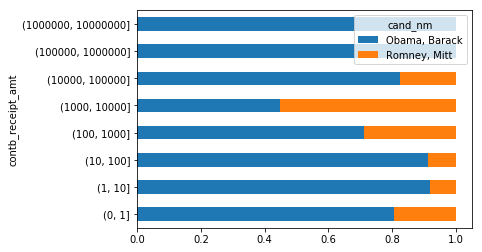

In [50]:
normed_sums.plot(kind='barh', stacked=True)

Aggregating the data by candidate and state is a routine affair

In [51]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [52]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [53]:
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,"56,405.00",135.00
AB,"2,048.00",0.00
AE,"42,973.75","5,680.00"
AK,"281,840.15","86,204.24"
AL,"543,123.48","527,303.51"
AP,"37,130.50","1,655.00"
AR,"359,247.28","105,556.00"
AS,"2,955.00",0.00
AZ,"1,506,476.98","1,888,436.23"


In [54]:
totals = totals[totals.sum(1) > 100000]

In [55]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,"281,840.15","86,204.24"
AL,"543,123.48","527,303.51"
AR,"359,247.28","105,556.00"
AZ,"1,506,476.98","1,888,436.23"
CA,"23,824,984.24","11,237,636.60"
CO,"2,132,429.49","1,506,714.12"
CT,"2,068,291.26","3,499,475.45"
DC,"4,373,538.80","1,025,137.50"
DE,"336,669.14","82,712.00"


In [56]:
percent = totals.div(totals.sum(1), axis=0)

In [57]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.77,0.23
AL,0.51,0.49
AR,0.77,0.23
AZ,0.44,0.56
CA,0.68,0.32
CO,0.59,0.41
CT,0.37,0.63
DC,0.81,0.19
DE,0.80,0.20


In [58]:
# from mpl_toolkits.basemap import Basemap, cm
# from matplotlib import rcParams
# from matplotlib.collections import LineCollection
# import matplotlib.pyplot as plt
# from shapelib import ShapeFile

In [74]:
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,"340,230,183.00",US GOVERNMENT,FOREIGN SERVICE OFFICER,25.00,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,"340,230,183.00",US GOVERNMENT,FOREIGN SERVICE OFFICER,110.00,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,"91,280,020.00",DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.00,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,"91,280,005.00",CISCO,ENGINEER,30.00,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,"90,120,092.00",RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.00,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


### Exercise 1: Plot Obama vs. Rommey


In [61]:
fec_mrbo_dt = fec_mrbo.set_index('contb_receipt_dt')

In [67]:
fec_mrbo_dt.index = pd.to_datetime(fec_mrbo_dt.index)

In [70]:
obama = fec_mrbo_dt[fec_mrbo_dt['cand_nm'] == 'Obama, Barack']
rommey = fec_mrbo_dt[fec_mrbo_dt['cand_nm'] == 'Romney, Mitt']

In [71]:
len(fec_mrbo_dt)

694282

In [73]:
len(obama) + len(rommey)

694282

In [78]:
obama.sort_index(inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
obama.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
contb_receipt_dt,,,,,,,,,,,,,,,,
2011-04-04,C00431445,P80003338,"Obama, Barack","HURD, TRACEY",CONCORD,MA,17424701,ALTMAN VILANDRIE & COMPANY,STRATEGY CONSULTANT,30.00,NaN,NaN,NaN,SA17A,756214,Democrat
2011-04-04,C00431445,P80003338,"Obama, Barack","LOGSDON, DANIEL",LEXINGTON,KY,405023636,KENTUCKY DEMOCRATIC PARTY,CHAIR/EXECUTIVE DIRECTOR,500.00,NaN,NaN,NaN,SA17A,756214,Democrat
2011-04-04,C00431445,P80003338,"Obama, Barack","LOCKETT IV, OTIS IV",MINEOLA,NY,11501,STARBUCKS COFFEE CORPORATION,RETAIL MANAGER,250.00,NaN,X,* OBAMA VICTORY FUND 2012,SA18,756214,Democrat
2011-04-04,C00431445,P80003338,"Obama, Barack","DEHAAN, ROBERT",ATLANTA,GA,303063304,RETIRED,RETIRED,200.00,NaN,NaN,NaN,SA17A,756214,Democrat
2011-04-04,C00431445,P80003338,"Obama, Barack","DENSON, REGINALD R.",CHICAGO,IL,"606,114,326.00",REACH MEDIA INC,VP SALES,500.00,NaN,X,* OBAMA VICTORY FUND 2012,SA18,756214,Democrat


In [80]:
rommey.sort_index(inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


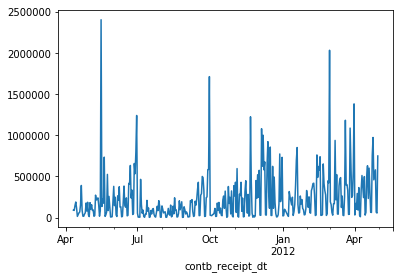

In [86]:
rommey.contb_receipt_amt.groupby('contb_receipt_dt').sum().plot(kind='line')

In [105]:
fec_mrbo_dt.groupby(['contb_receipt_dt','cand_nm']).contb_receipt_amt.sum()[:10]

contb_receipt_dt  cand_nm      
2011-04-04        Obama, Barack                                 648,485.12
2011-04-05        Obama, Barack                                 308,691.00
2011-04-06        Obama, Barack                                 247,542.59
2011-04-07        Obama, Barack                                 252,586.00
2011-04-08        Obama, Barack                                 296,302.00
2011-04-09        Obama, Barack                                 105,979.00
2011-04-10        Obama, Barack                                 100,373.00
2011-04-11        Obama, Barack                                 364,363.00
                  Romney, Mitt                                   89,475.00
2011-04-12        Obama, Barack                                 411,110.46
Name: contb_receipt_amt, dtype: float64

In [107]:
mrbo_plot_df = fec_mrbo_dt.groupby(['contb_receipt_dt','cand_nm']).contb_receipt_amt.sum().unstack()
mrbo_plot_df.head()


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_dt,,
2011-04-04,"648,485.12",nan
2011-04-05,"308,691.00",nan
2011-04-06,"247,542.59",nan
2011-04-07,"252,586.00",nan
2011-04-08,"296,302.00",nan


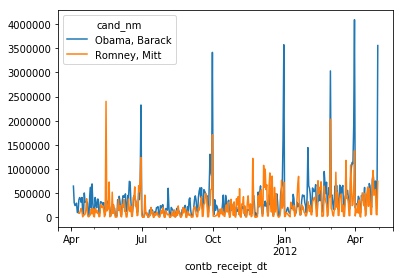

In [108]:
mrbo_plot_df.plot()

## Exercise 2: Cumulative Graphs

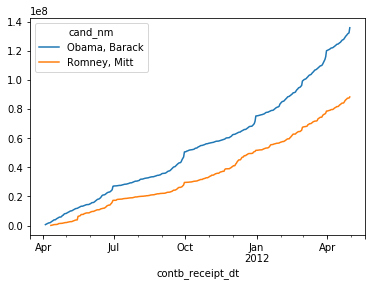

In [111]:
mrbo_plot_df.cumsum().plot()

In [113]:
(fec_mrbo_dt.contb_receipt_amt > 0).value_counts()

True    694282
Name: contb_receipt_amt, dtype: int64

## Exercise 3: Understand "Reattribution to Spouse"

In [130]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
party                1001731 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 129.9+ MB


In [149]:
obama_rommey = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [150]:
obama_rommey_receipt_desc = obama_rommey.dropna(subset=['receipt_desc'])

In [151]:
obama_rommy_memo_text = obama_rommey.dropna(subset=['memo_text'])

In [152]:
# mask 1
mask_receipt_desc =obama_rommey_receipt_desc.receipt_desc.str.contains('REATTRIBUTION TO SPOUSE')

In [153]:
mask_receipt_desc.value_counts()

False    7446
True      618
Name: receipt_desc, dtype: int64

In [155]:
# mask 2
mask_memo_text = obama_rommy_memo_text.memo_text.str.contains('REATTRIBUTION TO SPOUSE')

In [156]:
mask_memo_text.value_counts()

False    91362
True       618
Name: memo_text, dtype: int64

In [159]:
obama_rommey_receipt_desc[mask_receipt_desc].groupby('cand_nm').contb_receipt_amt.sum()

cand_nm
Romney, Mitt                              -1,063,841.86
Name: contb_receipt_amt, dtype: float64

In [161]:
obama_rommy_memo_text[mask_memo_text].groupby('cand_nm').contb_receipt_amt.sum()

cand_nm
Romney, Mitt                              -1,063,841.86
Name: contb_receipt_amt, dtype: float64

In [162]:
fec_receipt_desc = fec.dropna(subset=['receipt_desc'])

In [171]:
fec_in_need1 = fec_receipt_desc[fec_receipt_desc.receipt_desc.str.contains('REATTRIBUTION TO SPOUSE')]

In [165]:
fec_in_need1.groupby('cand_nm').contb_receipt_amt.sum()

cand_nm
Gingrich, Newt                                   -179,075.00
Huntsman, Jon                                     -63,250.00
Pawlenty, Timothy                                -330,845.01
Perry, Rick                                      -928,400.00
Romney, Mitt                                   -1,063,841.86
Santorum, Rick                                    -96,576.55
Name: contb_receipt_amt, dtype: float64

In [176]:
fec_in_need1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1326 entries, 06-FEB-12 to 09-OCT-11
Data columns (total 16 columns):
cmte_id              1326 non-null object
cand_id              1326 non-null object
cand_nm              1326 non-null object
contbr_nm            1326 non-null object
contbr_city          1325 non-null object
contbr_st            1326 non-null object
contbr_zip           1325 non-null object
contbr_employer      1326 non-null object
contbr_occupation    1326 non-null object
contb_receipt_amt    1326 non-null float64
receipt_desc         1326 non-null object
memo_cd              1326 non-null object
memo_text            1326 non-null object
form_tp              1326 non-null object
file_num             1326 non-null int64
party                1326 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 176.1+ KB


In [175]:
fec_in_need1.set_index('contb_receipt_dt',inplace=True)

In [177]:
fec_in_need1.index = pd.to_datetime(fec_in_need1.index)

In [178]:
fec_in_need1.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
contb_receipt_dt,,,,,,,,,,,,,,,,
2012-02-06,C00431171,P80003353,"Romney, Mitt","HENDERSON, RONALD E. DR.",MOUNTAIN BRK,AL,"352,132,325.00",RETIRED,RETIRED,-150.00,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,780124,Republican
2011-10-04,C00431171,P80003353,"Romney, Mitt","SANDERS, RANCE M. MR.",BIRMINGHAM,AL,"352,422,571.00",THE SANDERS TRUST,C.E.O.,"-1,000.00",REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,771927,Republican
2011-09-19,C00431171,P80003353,"Romney, Mitt","HENDERSON, RONALD E. DR.",MOUNTAIN BRK,AL,"352,132,325.00",SELF-EMPLOYED,PHYSICIAN,-150.00,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,760261,Republican
2011-09-20,C00431171,P80003353,"Romney, Mitt","LANIER, CLIFFORD MR. JR.",MONTGOMERY,AL,"361,042,501.00",THE FRAZER LANIER COMPANY,INVESTMENT BANKING,"-2,500.00",REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,760261,Republican
2011-08-01,C00431171,P80003353,"Romney, Mitt","BAILEY, ESSEL W. MRS.",MUSCLE SHOALS,AL,"356,612,129.00",RETIRED,RETIRED,-250.00,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,760261,Republican


In [181]:
fec_1 = fec_in_need1.groupby(['contb_receipt_dt','cand_nm']).contb_receipt_amt.sum().unstack()

In [198]:
fec_1 = fec_1.cumsum()

In [199]:
fec_1.head()

cand_nm,"Gingrich, Newt","Huntsman, Jon","Pawlenty, Timothy","Perry, Rick","Romney, Mitt","Santorum, Rick"
contb_receipt_dt,,,,,,
2011-03-22,"-5,000.00",nan,nan,nan,nan,nan
2011-03-31,"-12,500.00",nan,nan,nan,nan,nan
2011-04-06,"-15,000.00",nan,nan,nan,nan,nan
2011-04-07,"-17,500.00",nan,nan,nan,nan,nan
2011-04-12,"-27,500.00",nan,"-2,500.00",nan,nan,nan


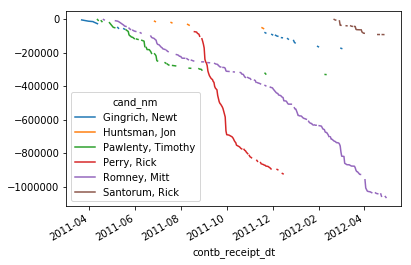

In [200]:
# cumulative "reattribution to spouse" donations
fec_1.plot()

In [193]:
fec_2 = fec.groupby(['contb_receipt_dt','cand_nm']).contb_receipt_amt.sum().unstack().cumsum()

In [196]:
fec_2.index = pd.to_datetime(fec_2.index)
fec_2

cand_nm,"Bachmann, Michelle","Cain, Herman","Gingrich, Newt","Huntsman, Jon","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy","Perry, Rick","Roemer, Charles E. 'Buddy' III","Romney, Mitt","Santorum, Rick"
contb_receipt_dt,,,,,,,,,,,,,
2011-04-01,nan,500.00,"9,500.00",nan,nan,nan,nan,nan,"2,635.00",nan,50.00,nan,nan
2012-04-01,nan,nan,"19,955.00",nan,625.00,nan,"203,883.05","18,097.26",nan,nan,nan,"28,165.12","24,862.06"
2011-08-01,"17,048.00","4,325.00","20,205.00","8,242.00","1,625.00",nan,"381,999.05","49,998.72","54,235.00",nan,"1,897.00","150,192.12","24,967.06"
2011-12-01,"48,602.72","45,707.07","140,960.00","23,942.00","2,350.00",nan,"1,034,706.87","72,817.21",nan,"6,325.00","2,772.00","385,264.92","38,106.06"
2011-02-01,nan,"45,957.07",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-02-01,nan,nan,"229,286.29","23,927.00","2,825.00",nan,"1,688,092.31","93,865.43",nan,"6,075.00","5,467.00","615,657.47","111,473.47"
2011-01-01,nan,"54,557.07",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-01-01,"51,092.72",nan,"237,216.29","25,063.00","5,100.00",nan,"1,746,191.11","127,384.87",nan,"6,600.00","5,982.00","634,984.47","127,701.47"
2011-07-01,"72,517.72","64,322.07","238,566.29","36,316.00","7,100.00",250.00,"1,912,152.11","143,882.61","60,290.00",nan,"6,082.00","680,921.95","131,151.47"


In [210]:
df_final = pd.merge(fec_1, fec_2, how='outer',left_index=True, right_index=True)
df_final

cand_nm,"Gingrich, Newt_x","Huntsman, Jon_x","Pawlenty, Timothy_x","Perry, Rick_x","Romney, Mitt_x","Santorum, Rick_x","Bachmann, Michelle","Cain, Herman","Gingrich, Newt_y","Huntsman, Jon_y","Johnson, Gary Earl","McCotter, Thaddeus G","Obama, Barack","Paul, Ron","Pawlenty, Timothy_y","Perry, Rick_y","Roemer, Charles E. 'Buddy' III","Romney, Mitt_y","Santorum, Rick_y"
contb_receipt_dt,,,,,,,,,,,,,,,,,,,
2011-01-01,nan,nan,nan,nan,nan,nan,nan,"54,557.07",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-03,nan,nan,nan,nan,nan,nan,nan,"579,136.74",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-04,nan,nan,nan,nan,nan,nan,nan,"828,130.30",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-12,nan,nan,nan,nan,nan,nan,nan,"2,451,538.44",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-13,nan,nan,nan,nan,nan,nan,nan,"2,688,360.23",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-14,nan,nan,nan,nan,nan,nan,nan,"2,873,997.76",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-15,nan,nan,nan,nan,nan,nan,nan,"3,167,955.14",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-16,nan,nan,nan,nan,nan,nan,nan,"3,382,322.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2011-01-17,nan,nan,nan,nan,nan,nan,nan,"3,581,514.63",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [211]:
df_final['perry_rick_ration'] = df_final['Perry, Rick_x'] / df_final['Perry, Rick_y']
df_final['rommey_mitt_ration'] = df_final['Romney, Mitt_x'] / df_final['Romney, Mitt_y']

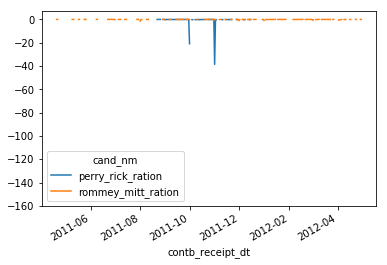

In [214]:
df_final[['perry_rick_ration','rommey_mitt_ration']].plot()